# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos Agonistas de la Hormona GLP-1**

### Avance 2: Ingeniería de características

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dra. Eduviges Ludivina Facundo Flores  – Profesor Tutor

### **Asesores**
- Dr. Juan Arturo Nolazco Flores
- Dr. Carlos Alberto Brizuela Rodríguez

#### **Miembros del equipo:**
- Cesar Ivan Herrera Martinez A01796392  
- Juan Antonio Cruz Acosta A01795375 
- Julio Baltazar Colín A01794476 

# Ingenieria de características

## Introducción: 

   La ingeniería de características (Feature Engineering) constituye un componente importante en todo proyecto de aprendizaje automático, pues es en esta fase donde los datos crudos adquieren una estructura analítica adecuada para el modelado. En el caso de este proyecto, enfocado en el estudio y modelado de péptidos GLP-1 para el análisis de su comportamiento bioactivo, esta etapa tiene como objetivo transformar las secuencias originales en representaciones numéricas que capturen las propiedades fisicoquímicas más relevantes. A través de este proceso, se busca construir un conjunto de características que refleje las particularidades estructurales y funcionales de cada péptido, sentando las bases para la creación de modelos predictivos más precisos y generalizables.

El alcance de este avance se centra específicamente en  “Crear nuevas características para mejorar el rendimiento de los modelos” y  “Mitigar el riesgo de características sesgadas y acelerar la convergencia de algunos algoritmos”, correspondientes a la fase de ingeniería de características. En esta etapa se aplicaran procedimientos sistemáticos de generación, transformación y normalización de variables, mediante el uso de herramientas bioinformáticas como iFeatureOmega para derivar descriptores que describen la composición, hidrofobicidad, carga eléctrica, flexibilidad y otras propiedades moleculares de los péptidos. Estas operaciones permitirán transformar información biológica compleja en vectores numéricos estructurados, que facilitaran la comparación, clasificación y modelado estadístico de las secuencias.

Además de la generación de nuevas características, este avance abordará la selección y reducción de variables mediante métodos estadísticos y de extracción de características, con el fin de eliminar redundancias y concentrar la información más significativa del conjunto de datos. Técnicas como el Análisis de Componentes Principales (PCA), el umbral de varianza y la evaluación de correlaciones serán implementadas para identificar las dimensiones más informativas, optimizando así el espacio de representación. Estas estrategias no solo reducen el número de variables necesarias, sino que también contribuyen a la aceleración de la convergencia de los algoritmos de aprendizaje, al simplificar la estructura de los datos y disminuir el ruido estadístico.

El propósito integral de este avance es garantizar que el conjunto de datos resultante sea más robusto, balanceado y biológicamente interpretable, minimizando el riesgo de sesgos derivados de la sobre-representación de ciertas propiedades y mejorando la capacidad de los modelos para identificar patrones significativos. De esta forma, la ingeniería de características aplicada en esta etapa no se limitará a un proceso técnico, sino que representará un puente entre el conocimiento biológico y el modelado computacional, asegurando que la información relevante de los péptidos GLP-1 se preserve y se exprese en términos cuantitativos útiles para la fase de aprendizaje automático posterior.

## Analisis de secuencias de péptidos

### Analisis de diversidad en las secuencias

#### Carga de los datos del EDA

In [1]:
# Carga de archivos y librerias

import pandas as pd
import numpy as np
from pathlib import Path
from typing import Optional
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import sys
import os
# Análisis de propiedades fisicoquímicas de las secuencias después de CD-HIT
from iFeatureOmega import iFeatureOmegaCLI

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


In [2]:
# Rutas locales a Bibliotecas y utilerias
# from pathlib import Path

# ruta del directorio del notebook actual
notebook_dir = Path.cwd()

# Subir un nivel para llegar a la carpeta raíz del proyecto
project_root = notebook_dir.parent

# Añadir la carpeta raíz al path de Python
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))
    print(f"Ruta del proyecto añadida al path: {project_root}")

from src.bio_utils import save_df_as_fasta, fasta_to_dataframe, inspect_fasta_file, calculate_identity_matrix
from src.plotting import identity_heatmap, cumulative_variance_plot, plot_pca_2d

Ruta del proyecto añadida al path: d:\source\Proyecto Integrador\glp-1_drug_discovery


In [3]:
# Ruta los archivos de datos
directorio_base = Path("../")
directorio_datos = Path(directorio_base / "data")
raw_data_dir = directorio_datos / "raw"
processed_data_dir = directorio_datos / "processed"
ruta_125_ec50= directorio_datos/raw_data_dir/ "125_EC50.csv"

# Ruta archivos procesados

# Ruta archivo FASTA filtrado
ruta_fasta_glp1_sec_activa= processed_data_dir / "GLP-1_Activo.fasta"

# Ruta archivo CSV con péptidos GLP-1 identificados
ruta_csv_glp_identificados= processed_data_dir / "glucagon_like_peptides.csv"

# Ruta archivo CSV con péptidos  con actividad EC50
ruta_125_ec50= directorio_datos/raw_data_dir/ "125_EC50.csv"

# Ruta archivo FASTA con péptidos  con actividad EC50
ruta_fasta_125_ec50= processed_data_dir / "125_EC50.fasta"


In [4]:
# Carga de datos fasta de la proteina GLP-1R
load_gpl1_fasta_results = inspect_fasta_file(ruta_fasta_glp1_sec_activa)

if load_gpl1_fasta_results and load_gpl1_fasta_results['is_valid']:
    print(f"'{ruta_fasta_glp1_sec_activa}' es válido.")
    print(f"Se encontraron {load_gpl1_fasta_results['record_count']} registros válidos.")

df_glp1_sec_activa = fasta_to_dataframe(ruta_fasta_glp1_sec_activa)
print(f"Dimensiones del DataFrame: {df_glp1_sec_activa.shape}")

Inspecting file: ..\data\processed\GLP-1_Activo.fasta...
  - OK! File is structurally valid. Found 897 records.
'..\data\processed\GLP-1_Activo.fasta' es válido.
Se encontraron 897 registros válidos.
Dimensiones del DataFrame: (897, 3)


In [5]:
# muestra de los datos
df_glp1_sec_activa.head(3)

,id,description,sequence
0,AF-A0A060VXS0-F1,AF-A0A060VXS0-F1,HAEGTYTSDMSSYLQDQAAKEFVSWLKNGR
1,AF-A0A060VY52-F1,AF-A0A060VY52-F1,HAEGTYTSDVSSYLQDQAAKEFVSWLKNGR
2,AF-A0A060WDT4-F1,AF-A0A060WDT4-F1,HADGTYTSDVSTYLQDQAAKDFVSWLKSGL


In [6]:
# carga de datos csv de los peptidos GLP-1 identificados y con actividad EC50
try:
    df_glp1_identificados = pd.read_csv(ruta_csv_glp_identificados)
    print(f"Archivo '{ruta_csv_glp_identificados}' cargado correctamente.")
    print(f"Dimensiones del DataFrame: {df_glp1_identificados.shape}")
except FileNotFoundError:
    print(f"Error: El archivo '{ruta_csv_glp_identificados}' no se encontró.")

Archivo '..\data\processed\glucagon_like_peptides.csv' cargado correctamente.
Dimensiones del DataFrame: (897, 34)


In [7]:
# carga de datos csv de los peptidos con actividad EC50 para entrenar el modelo
try:
    df_125_ec50 = pd.read_csv(ruta_125_ec50)
    print(f"Archivo '{ruta_125_ec50}' cargado correctamente.")
    print(f"Dimensiones del DataFrame: {df_125_ec50.shape}")
except FileNotFoundError:
    print(f"Error: El archivo '{ruta_125_ec50}' no se encontró.")

Archivo '..\data\..\data\raw\125_EC50.csv' cargado correctamente.
Dimensiones del DataFrame: (125, 9)


In [8]:
# Muestra de los datos
df_125_ec50.head(5)

,Unnamed: 0,pep_ID,alias,sequence,length,EC50_T1,EC50_LOG_T1,EC50_T2,EC50_LOG_T2
0,1,seq_pep1,training_data,HSQGTFTSDYSKYLDSRRAQDFVQWLEEGE,30,3.75,-11.43,563.00,-9.25
1,2,seq_pep2,training_data,HSQGTFTSDYSKYLDSRRAEDFVQWLENGE,30,18.50,-10.73,552.00,-9.26
2,3,seq_pep3,training_data,HSQGTFTSDYSKYLDSRRAEDFVQWLENT,29,3.51,-11.45,252.00,-9.60
3,4,seq_pep4,training_data,HSQGTFTSDYSKYLDSRRAEDFVQWLVAGGSGSGSG,36,50.50,-10.30,6.03,-11.22
4,5,seq_pep5,training_data,HSQGTFTSDYSKYLDSRRAQDFVQWLEAEG,30,2.87,-11.54,238.00,-9.62


In [9]:
#conversión de archivos de 125 peptidos a fasta para el calculo de propiedades

dt_temp = df_125_ec50.copy()
dt_temp['Fasta_Header'] = df_125_ec50['Fasta_Header'] = df_125_ec50['pep_ID'] + ' ' +'EC50_T2'+ ' '+ df_125_ec50['EC50_T2'].astype(str)

save_df_as_fasta(
    dataframe=dt_temp,
    id_col='Fasta_Header',
    seq_col='sequence',
    output_file=ruta_fasta_125_ec50
    
)

results = inspect_fasta_file(Path(ruta_fasta_125_ec50))

if results and results['is_valid']:
    print(f"'{ruta_fasta_125_ec50}' es válido.")
    print(f"Se encontraron {results['record_count']} registros válidos.")
else:
    print(f"\nLa validación falló para '{ruta_fasta_125_ec50}'. Por favor, revisa los registros.")

del dt_temp, results

Success! DataFrame has been saved to '..\data\processed\125_EC50.fasta'.
Inspecting file: ..\data\processed\125_EC50.fasta...
  - OK! File is structurally valid. Found 125 records.
'..\data\processed\125_EC50.fasta' es válido.
Se encontraron 125 registros válidos.


## Agrupación de secuencias biológicas CD-Hit

### CD-HIT
"CD-Hit es una herramienta bioinformática ampliamente utilizada para agrupar secuencias biológicas, como proteínas o ácidos nucleicos, en función de su similitud. Su objetivo principal es reducir la redundancia en grandes conjuntos de datos de secuencias, facilitando el análisis y la interpretación de la información genética o proteica.

Utiliza un algoritmo de clustering rápido y eficiente que agrupa secuencias similares basándose en un umbral de identidad definido por el usuario. Las secuencias que superan este umbral se agrupan en un solo clúster, representado por una secuencia representativa, mientras que las secuencias que no cumplen con el criterio permanecen como secuencias individuales.  

CD-Hit,Permite identificar familias de secuencias relacionadas, estudiar la diversidad genética, y optimizar bases de datos de secuencias para análisis posteriores, como la anotación funcional o la predicción estructural. CD-Hit es especialmente útil en estudios de genómica, proteómica y metagenómica, donde se manejan grandes volúmenes de datos secuenciales" (Fu et al., 2012).

#### Aplicación al conjunto de datos:

En los conjuntos de datos biológicos, es común encontrar secuencias redundantes o con una similitud muy alta (por ejemplo, múltiples entradas para la misma proteína o variantes con mutaciones menores). Esta redundancia, si no se trata, puede introducir un sesgo significativo en los modelos de machine learning. 

En este análisis, la aplicación de CD-HIT sobre nuestro conjunto de datos de péptidos análogos al glucagón tiene los siguientes objetivos:

- Eliminar Redundancia: Se descartan las secuencias idénticas o casi idénticas, que no aportan nueva información al modelo.

- Aumentar la Diversidad: Al quedarnos con una única secuencia representativa de cada clúster, nos aseguramos de que el conjunto de datos final contenga una variedad más amplia de péptidos.

- Crear un Conjunto de Datos óptimo: Se genera un conjunto de datos "limpio" y no sesgado, ideal para el entrenamiento.

In [10]:
# Ruta archivo fasta con resultados de CD-HIT
cd_hit_results_fasta = processed_data_dir / "cd-hit_results.fasta"

In [11]:
## Conversión de rutas de Windows a WSL
import subprocess
from pathlib import Path

def convert_to_wsl_path(windows_path: str) -> str:
    """
    Convierte una ruta de Windows a su equivalente en WSL usando 'wslpath'.
    
    Args:
        windows_path (str): La ruta en formato Windows (e.g., "C:\\Users\\...").

    Returns:
        str: La ruta en formato WSL (e.g., "/mnt/c/Users/...").
    """
    # Ejecuta 'wslpath -u' para convertir la ruta
    result = subprocess.run(["wsl", "wslpath", "-u", windows_path], capture_output=True, text=True, check=True)
    # .strip() elimina cualquier espacio o nueva línea al final
    return result.stdout.strip()


In [12]:
# Ejecutar CD-HIT en WSL con rutas convertidas
#  Define tus rutas en Windows usando pathlib
#    .resolve() las convierte en rutas absolutas, lo cual es útil para evitar problemas con rutas relativas
input_fasta_win = Path(ruta_fasta_glp1_sec_activa).resolve()
output_cdhit_win = Path(cd_hit_results_fasta).resolve()

try:
    # 2. Convierte las rutas de Windows a formato WSL
    input_fasta_wsl = convert_to_wsl_path(str(input_fasta_win))
    output_cdhit_wsl = convert_to_wsl_path(str(output_cdhit_win))

    print(f"Ruta de Windows (entrada): {input_fasta_win}")
    print(f"Ruta de WSL (entrada):    {input_fasta_wsl}")
    print("-" * 20)
    print(f"Ruta de Windows (salida): {output_cdhit_win}")
    print(f"Ruta de WSL (salida):     {output_cdhit_wsl}")
    print("-" * 20)

    # 3. Construye el comando final con las rutas ya convertidas
    command = [
        "wsl", 
        "cd-hit", 
        "-i", input_fasta_wsl, 
        "-o", output_cdhit_wsl, 
        "-c", "0.99",
        "-T", "4"  # Usa 4 hilos (ajusta según tu CPU)
    ]

    # 4. Ejecuta el comando
    print("Ejecutando comando en WSL...")
    return_status = subprocess.run(command, capture_output=True, text=True)

    # Imprime la salida y los errores para depuración
    print(return_status.stdout)
    
    if return_status.returncode == 0:
        print("\nComando ejecutado exitosamente.")
    else:
        print(f"\nEl comando falló con código de error: {return_status.returncode}")
        print("\n--- ERRORES (STDERR) ---")
        print(return_status.stderr)
        
except FileNotFoundError:
    print("Error: Asegúrate de que WSL y/o 'cd-hit' estén instalados y en el PATH del sistema.")
except subprocess.CalledProcessError as e:
    print(f"Error al convertir una ruta con wslpath: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

Ruta de Windows (entrada): D:\source\Proyecto Integrador\glp-1_drug_discovery\data\processed\GLP-1_Activo.fasta
Ruta de WSL (entrada):    /mnt/d/source/Proyecto Integrador/glp-1_drug_discovery/data/processed/GLP-1_Activo.fasta
--------------------
Ruta de Windows (salida): D:\source\Proyecto Integrador\glp-1_drug_discovery\data\processed\cd-hit_results.fasta
Ruta de WSL (salida):     /mnt/d/source/Proyecto Integrador/glp-1_drug_discovery/data/processed/cd-hit_results.fasta
--------------------
Ejecutando comando en WSL...
Program: CD-HIT, V4.8.1 (+OpenMP), Sep 17 2025, 17:21:22
Command: cd-hit -i
         /mnt/d/source/Proyecto Integrador/glp-1_drug_discovery/data/processed/GLP-1_Activo.fasta
         -o
         /mnt/d/source/Proyecto Integrador/glp-1_drug_discovery/data/processed/cd-hit_results.fasta
         -c 0.99 -T 4

Started: Sun Oct  5 17:23:05 2025
                            Output                              
----------------------------------------------------------------

In [13]:
# carga de datos fasta del resultado de cd-hit
load_cdhit_fasta_results = inspect_fasta_file(cd_hit_results_fasta)

if load_cdhit_fasta_results and load_cdhit_fasta_results['is_valid']:
    print(f"'{cd_hit_results_fasta}' es válido.")
    print(f"Se encontraron {load_cdhit_fasta_results['record_count']} registros válidos.")

df_cdhit = fasta_to_dataframe(cd_hit_results_fasta)
print(f"Dimensiones del DataFrame: {df_cdhit.shape}")

Inspecting file: ..\data\processed\cd-hit_results.fasta...
  - OK! File is structurally valid. Found 225 records.
'..\data\processed\cd-hit_results.fasta' es válido.
Se encontraron 225 registros válidos.
Dimensiones del DataFrame: (225, 3)


### Análisis de diversidad de las secuencias

#### Análisis previo a CD-HIT

Calculando matriz de identidad ANTES de CD-HIT...


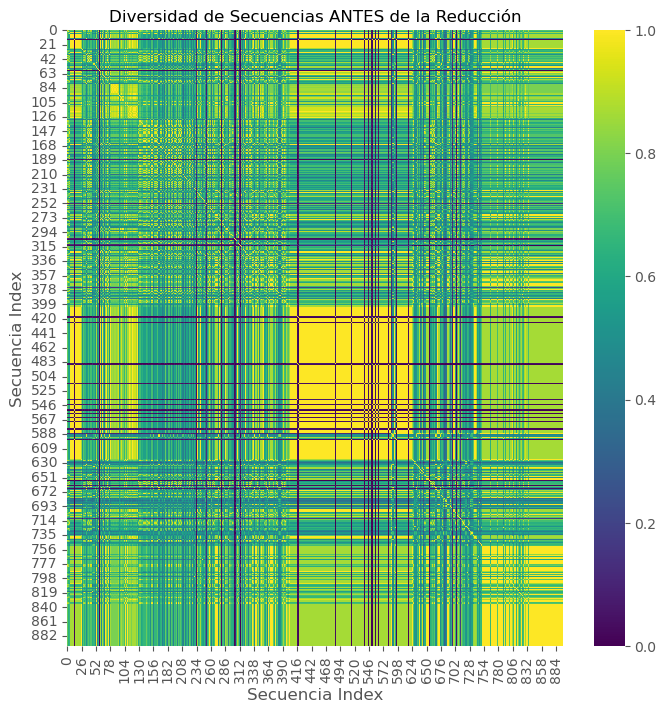

In [14]:
# Mapa de calor de la matriz de identidad antes de CD-HIT
# 1. Extraer la lista de secuencias
sequences_before = df_glp1_sec_activa['sequence'].tolist()

# 2. Calcular la matriz
print("Calculando matriz de identidad ANTES de CD-HIT...")
identity_matrix_before = calculate_identity_matrix(sequences_before)

# 3. Visualizar el mapa de calor
identity_heatmap(identity_matrix_before, 'Diversidad de Secuencias ANTES de la Reducción')

Gráfico 1: Diversidad ANTES de la Reducción 
Este primer gráfico revela las características del conjunto de datos original:

- Alta Redundancia: El mapa está dominado por colores cálidos (verde y amarillo). Esto indica que, en general, las secuencias en el conjunto de datos son muy similares entre sí.

- Bloques de Identidad: Se observan grandes cuadrados de color amarillo fuera de la diagonal principal. Estos bloques evidencia de redundancia. Cada bloque representa un grupo de secuencias que son idénticas entre sí.

- Sesgo: Un conjunto de datos con esta estructura habría causado un sesgo en un modelo de machine learning. El modelo habría aprendido a reconocer muy bien las características de los grupos sobrerrepresentados, pero tendría un bajo rendimiento para predecir secuencias más diversas.



### Análisis despues de CD-HIT

Calculando matriz de identidad DESPUÉS de CD-HIT...


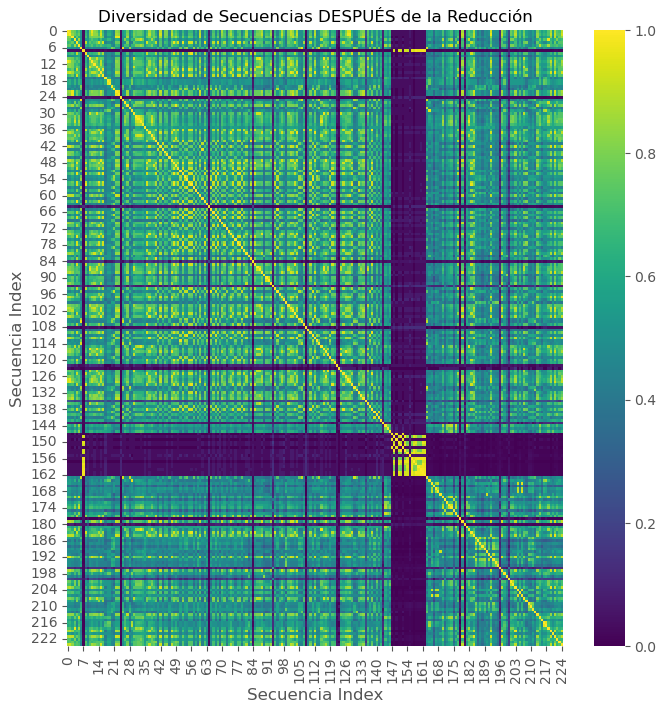

In [15]:
# Mapa de calor de la matriz de identidad después de CD-HIT
# 1. Extraer la lista de secuencias
sequences_after = df_cdhit['sequence'].tolist()

# 2. Calcular la matriz
print("Calculando matriz de identidad DESPUÉS de CD-HIT...")
identity_matrix_after = calculate_identity_matrix(sequences_after)

# 3. Visualizar el mapa de calor
identity_heatmap(identity_matrix_after, 'Diversidad de Secuencias DESPUÉS de la Reducción')

Gráfico 2: Diversidad DESPUÉS de la Reducción
El segundo gráfico muestra el conjunto de datos después de aplicar CD-HIT:

- Reducción del Tamaño del Conjunto de Datos: El número de secuencias se ha reducido de aproximadamente 889 a 224.

- Aumento de la Diversidad: El mapa ahora está dominado por el color púrpura oscuro. Esto significa que la similitud entre la mayoría de los pares de secuencias es baja. Las secuencias que quedan son, en su mayoría, distintas entre sí.

- Eliminación de la Redundancia: Los grandes bloques amarillos han desaparecido. El color amarillo ahora está en la diagonal principal, donde cada secuencia se compara consigo misma.

## Cálculo de descriptores de Composición y Orden en Secuencias de Proteínas

### Descriptores de Composición y Orden en Secuencias de Proteínas
Estos métodos transforman secuencias de aminoácidos en vectores numéricos, capturando la información esencial sobre la composición, orden y propiedades fisicoquímicas para su uso en modelos de aprendizaje automático y otras herramientas de analisis de proteinas.

Para este análisis e ingenieria de características se eligieron siete propiedades, para mantener limitada la dimensionalidad de el conjunto de datos.

#### Descriptores Basados en Composición
Estos descriptores se centran en la frecuencia de los aminoácidos o sus agrupaciones.

- **AAC (Amino Acid Composition)**: Es el descriptor más fundamental. Calcula la frecuencia relativa de cada uno de los 20 aminoácidos estándar en una secuencia, resultando en un vector de 20 dimensiones. Ignora el orden de los aminoácidos.


- **DPC type 1 (Dipeptide Composition)**: Este método calcula la frecuencia de los 400 pares de aminoácidos adyacentes posibles (dipéptidos). Al considerar los vecinos inmediatos, captura información sobre el orden local en la secuencia.


#### Descriptores CTD (Composition, Transition, Distribution)

- **CTD** convierte la secuencia de aminoácidos en una secuencia de propiedades fisicoquímicas (como hidrofobicidad, polaridad, carga, etc.). Los aminoácidos se clasifican en tres grupos para cada propiedad (ej., para hidrofobicidad: polares, neutros e hidrofóbicos). Este calculo se realiza bajo tres propiedades:

- **CTDC** (Composition): Mide la composición global de cada uno de los tres grupos de propiedades en la secuencia. Por ejemplo, para la hidrofobicidad, el resultado sería el porcentaje de residuos polares, neutros e hidrofóbicos. Su fórmula es: 

$$
C(r)=N(r)/N.
$$

- **CTDT (Transition)**: Describe la frecuencia con la que ocurren transiciones entre los diferentes grupos de propiedades. Por ejemplo, mide qué tan a menudo un residuo polar es seguido por uno neutro, o viceversa. Se calcula como:

$$
T(r,s) = \frac{N(r,s) + N(s,r)}{N-1}
$$

- **CTDD (Distribution)**: Proporciona información sobre la distribución de cada grupo de propiedades a lo largo de la secuencia. Para cada grupo, se calcula la posición del primer residuo, y las posiciones donde se alcanza el 25%, 50%, 75% y 100% de los residuos de ese grupo. Esto da como resultado un vector de 5 dimensiones para cada uno de los 3 grupos.

#### Descriptores Basados en el Orden y Propiedades Fisicoquímicas

Estos descriptores emplean el orden de la secuencia y las propiedades de los aminoácidos para crear representaciones.

- **SOCNumber (Sequence-Order-Coupling Number)**: Este descriptor cuantifica el acoplamiento entre aminoácidos a diferentes distancias. El número de acoplamiento de orden 

*d* se define como la suma de los cuadrados de las distancias (según matrices de distancia fisicoquímicas como las de Schneider-Wrede o Grantham) entre todos los pares de aminoácidos separados por *d-1* residuos.

- **QSOrder (Quasi-sequence-order)**: Los descriptores de cuasi-orden de secuencia combinan la composición de aminoácidos (AAC) con los números de acoplamiento de orden de secuencia (SOCNumber). El vector resultante contiene 20 componentes que representan la frecuencia normalizada de cada aminoácido y componentes adicionales que representan los números de acoplamiento ponderados, capturando así tanto la composición como las correlaciones de orden a largo alcance.

- **PAAC (Pseudo-Amino Acid Composition)**: Al igual que QSOrder, el PAAC combina la composición de aminoácidos con información de orden de secuencia. La información de orden se deriva de funciones de correlación basadas en propiedades fisicoquímicas como la hidrofobicidad, hidrofilicidad y masa de la cadena lateral. El resultado es un vector de 

20+λ dimensiones, donde λ es el número de tiers de correlación considerados.

- **APAAC (Amphiphilic Pseudo-Amino Acid Composition)**: Es una variante del PAAC que se enfoca específicamente en las propiedades anfipáticas de la secuencia. Utiliza funciones de correlación basadas en los valores de hidrofobicidad e hidrofilicidad para construir los componentes de orden de secuencia. El vector resultante tiene 

20+2λ dimensiones, capturando las correlaciones de estas dos propiedades a lo largo de λ tiers.

(Chou, 2001)


### Cálculo de las propiedades usando iFeature Omega

#### Definímos funciones auxiliares para calcular los descriptores

In [16]:
# cargar las configuraciónes
ifeatures_settings_json = Path(directorio_datos / "iFeature Settings" / "Protein_parameters_setting.json") 

In [17]:
# Funcion para el cálculo de descriptor

def compute_single_descriptor(input_fasta_file, descriptor, settings_json_file=None):
    """
    Calcula un descriptor con iFeatureOmega y devuelve un DataFrame indexado por ID.

    Parámetros
    ----------
    input_fasta_file : str
        Ruta al archivo FASTA o TXT con secuencias.
    descriptor : str
        Nombre del descriptor (por ejemplo, "AAC", "DPC", "CTDC").
    settings_json_file : str | None
        Ruta al archivo JSON de configuración de parámetros.

    Retorna
    -------
    pandas.DataFrame
        DataFrame con las secuencias como índice y columnas prefijadas con el descriptor.
    """
    print(f"Calculando descriptor: {descriptor}")

    protein = iFeatureOmegaCLI.iProtein(input_fasta_file)

    if settings_json_file:
        try:
            protein.import_parameters(settings_json_file)
        except Exception as e:
            print(f"No se pudo importar parámetros: {e}")

    try:
        protein.get_descriptor(descriptor)
    except Exception as e:
        print(f"Error al calcular {descriptor}: {e}")
        return None

    df = protein.encodings.reset_index()

    if df.empty:
         print(f"Descriptor {descriptor} no generó resultados.")
         return None

    # # Normalizar el nombre de la columna ID y ponerla como índice
    df.rename(columns={df.columns[0]: "ID"}, inplace=True)
    df = df.set_index("ID")
    return df


In [18]:
# Funcion para el calculo de varios descriptores usando una lista
def compute_peptide_features(input_fasta_file, descriptors, settings_json_file, output_csv=None):
    """
    Calcula descriptores relevantes con iFeatureOmega y devuelve un DataFrame.
    """
    if not descriptors or not isinstance(descriptors, (list, tuple)):
        raise ValueError("Se necesita una lista no vacía de descriptores.")

    results = []
    for desc in descriptors:
        df = compute_single_descriptor(input_fasta_file, desc, settings_json_file)
        if df is not None:
            results.append((desc, df))

    if not results:
        raise Exception("No se pudieron calcular descriptores válidos.")

    combined = results[0][1]
    for desc, df in results[1:]:
        combined = combined.merge(df, left_index=True, right_index=True, how="inner")

    combined.reset_index(inplace=True)

    if output_csv:
        combined.to_csv(output_csv, index=False)
        print(f"Resultados guardados en {output_csv}")

    expected_ids = results[0][1].index
    for desc, df in results[1:]:
        lost = set(expected_ids) - set(df.index)
        if lost:
            print(f"En el descriptor {desc} faltaron {len(lost)} secuencias: {list(lost)[:3]}...")

    return combined


In [19]:
# Definimos una lista de descriptores
descriptores = [
            "AAC",          # Amino Acid Composition
            "DPC type 1",   # Dipeptide Composition
            "CTDC",         # Composition descriptor of CTD
            "CTDT",         # Transition descriptor
            "CTDD",         # Distribution descriptor
            "PAAC",         # Pseudo amino acid composition
            "APAAC",        # Amphiphilic pseudo amino acid comp.
            "SOCNumber",    # Sequence-order-coupling number
            "QSOrder",      # Quasi-sequence-order
        ]

#### Cálculo de los descriptores para las secuencias procedentes de CD-Hit

Este conjunto de datos será el que se evaluará para determinar su efectividad para enlazarse al receptor GLP-1R


In [20]:
# Calculamos los descriptores
df_descriptores_cdhit = compute_peptide_features(cd_hit_results_fasta, descriptores, ifeatures_settings_json)

Calculando descriptor: AAC
File imported successfully.
Calculando descriptor: DPC type 1
File imported successfully.
Calculando descriptor: CTDC
File imported successfully.
Calculando descriptor: CTDT
File imported successfully.
Calculando descriptor: CTDD
File imported successfully.
Calculando descriptor: PAAC
File imported successfully.
Calculando descriptor: APAAC
File imported successfully.
Calculando descriptor: SOCNumber
File imported successfully.
Calculando descriptor: QSOrder
File imported successfully.


In [21]:
# muestra de los descriptores
df_descriptores_cdhit.head()

,ID,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,...,QSOrder_Grantham.Xr.T,QSOrder_Grantham.Xr.W,QSOrder_Grantham.Xr.Y,QSOrder_Grantham.Xr.V,QSOrder_Schneider.Xd.1,QSOrder_Schneider.Xd.2,QSOrder_Schneider.Xd.3,QSOrder_Grantham.Xd.1,QSOrder_Grantham.Xd.2,QSOrder_Grantham.Xd.3
0,AF-A0A060VXS0-F1,0.100000,0.0,0.066667,0.066667,0.033333,0.066667,0.033333,0.000000,0.066667,...,0.000044,0.000022,0.000044,0.000022,0.211439,0.226593,0.193363,0.305946,0.398305,0.295727
1,AF-A0A060VY52-F1,0.100000,0.0,0.066667,0.066667,0.033333,0.066667,0.033333,0.000000,0.066667,...,0.000044,0.000022,0.000044,0.000044,0.210518,0.224985,0.194083,0.303795,0.396899,0.299284
2,AF-A0A060WDT4-F1,0.100000,0.0,0.133333,0.000000,0.033333,0.066667,0.033333,0.000000,0.066667,...,0.000063,0.000021,0.000042,0.000042,0.200063,0.213188,0.210418,0.307237,0.384096,0.308647
3,AF-A0A087VEU7-F1,0.133333,0.0,0.033333,0.100000,0.033333,0.100000,0.033333,0.066667,0.033333,...,0.000072,0.000024,0.000048,0.000024,0.202669,0.208992,0.207828,0.325355,0.370518,0.304103
4,AF-A0A087XPV4-F1,0.100000,0.0,0.133333,0.000000,0.066667,0.066667,0.033333,0.033333,0.100000,...,0.000042,0.000000,0.000021,0.000042,0.186085,0.225168,0.221368,0.297677,0.382796,0.319506


#### Calculamos los descriptores del conjunto de 125 péptidos con actividad EC50 conocida.
Este conjunto de datos servirá para entrenar y validad los modelos que se emplearan para predecir la actividad de los péptidos de los que desconocemos su actividad EC50


In [22]:
### calculamos las propiedades fisico quimicas para el conjunto de 125 Peptidos con actividad EC50

df_descriptores_125p = compute_peptide_features(ruta_fasta_125_ec50, descriptores, ifeatures_settings_json)

Calculando descriptor: AAC
File imported successfully.
Calculando descriptor: DPC type 1
File imported successfully.
Calculando descriptor: CTDC
File imported successfully.
Calculando descriptor: CTDT
File imported successfully.
Calculando descriptor: CTDD
File imported successfully.
Calculando descriptor: PAAC
File imported successfully.
Calculando descriptor: APAAC
File imported successfully.
Calculando descriptor: SOCNumber
File imported successfully.
Calculando descriptor: QSOrder
File imported successfully.


In [23]:
# muestra de los resultados
df_descriptores_125p.head(3)

,ID,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,...,QSOrder_Grantham.Xr.T,QSOrder_Grantham.Xr.W,QSOrder_Grantham.Xr.Y,QSOrder_Grantham.Xr.V,QSOrder_Schneider.Xd.1,QSOrder_Schneider.Xd.2,QSOrder_Schneider.Xd.3,QSOrder_Grantham.Xd.1,QSOrder_Grantham.Xd.2,QSOrder_Grantham.Xd.3
0,seq_pep1,0.033333,0.0,0.100000,0.100000,0.066667,0.066667,0.033333,0.0,0.033333,...,0.000045,0.000023,0.000045,0.000023,0.242596,0.243376,0.148768,0.332017,0.389247,0.278714
1,seq_pep2,0.033333,0.0,0.100000,0.100000,0.066667,0.066667,0.033333,0.0,0.033333,...,0.000044,0.000022,0.000044,0.000022,0.240487,0.248035,0.142783,0.322224,0.392330,0.285424
2,seq_pep3,0.034483,0.0,0.103448,0.068966,0.068966,0.034483,0.034483,0.0,0.034483,...,0.000068,0.000023,0.000045,0.000023,0.233972,0.240618,0.143956,0.319652,0.397344,0.282981


### Guardamos la información en formato CSV para el análisis y posterior carga

In [24]:
# Unión de los dataframes de las propiedades con los datos de identificación 
df_resultado = pd.merge(
    left=df_descriptores_125p,         
    right=df_125_ec50[['pep_ID', 'EC50_T2', 'EC50_LOG_T2']], 
    left_on='ID',                      
    right_on='pep_ID',                 
    how='left'                        
)

df_descriptores_125p = df_resultado.drop('pep_ID', axis=1)
df_descriptores_125p['ID'] = df_descriptores_125p['ID'].astype("string")
df_descriptores_125p['EC50_T2'] = df_descriptores_125p['EC50_T2'].astype("float64")
df_descriptores_125p['EC50_LOG_T2'] = df_descriptores_125p['EC50_LOG_T2'].astype("float64")

In [25]:
df_descriptores_125p.head()

,ID,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,...,QSOrder_Grantham.Xr.Y,QSOrder_Grantham.Xr.V,QSOrder_Schneider.Xd.1,QSOrder_Schneider.Xd.2,QSOrder_Schneider.Xd.3,QSOrder_Grantham.Xd.1,QSOrder_Grantham.Xd.2,QSOrder_Grantham.Xd.3,EC50_T2,EC50_LOG_T2
0,seq_pep1,0.033333,0.0,0.100000,0.100000,0.066667,0.066667,0.033333,0.0,0.033333,...,0.000045,0.000023,0.242596,0.243376,0.148768,0.332017,0.389247,0.278714,563.00,-9.25
1,seq_pep2,0.033333,0.0,0.100000,0.100000,0.066667,0.066667,0.033333,0.0,0.033333,...,0.000044,0.000022,0.240487,0.248035,0.142783,0.322224,0.392330,0.285424,552.00,-9.26
2,seq_pep3,0.034483,0.0,0.103448,0.068966,0.068966,0.034483,0.034483,0.0,0.034483,...,0.000045,0.000023,0.233972,0.240618,0.143956,0.319652,0.397344,0.282981,252.00,-9.60
3,seq_pep4,0.055556,0.0,0.083333,0.027778,0.055556,0.166667,0.027778,0.0,0.027778,...,0.000044,0.000044,0.222942,0.231500,0.150119,0.311165,0.366846,0.321967,6.03,-11.22
4,seq_pep5,0.066667,0.0,0.100000,0.066667,0.066667,0.066667,0.033333,0.0,0.033333,...,0.000045,0.000022,0.254242,0.221244,0.159753,0.344734,0.368942,0.286301,238.00,-9.62


In [26]:
# Definición de las rutas de los archivos 
descriptores_125_csv = processed_data_dir/"descriptores_125.csv"
descriptores_cdhit_csv = processed_data_dir/"descriptores_cdhit.csv"

In [27]:
# Guardado de resultados

df_descriptores_125p.to_csv(descriptores_125_csv, index=False)   
df_descriptores_cdhit.to_csv(descriptores_cdhit_csv, index=False)   

## Analisis de Componentes Principales PCA

El Análisis de Componentes Principales (PCA,) es una técnica de reducción de dimensionalidad utilizada en ciencia de datos y aprendizaje automático. Su objetivo principal es transformar un conjunto de datos con un gran número de características correlacionadas en un nuevo conjunto de variables no correlacionadas llamadas componentes principales Shlens, J. (2014)

El análisis busca las direcciones en los datos donde la varianza es máxima.
-	El primer componente principal (PC1) es la dirección que captura la mayor cantidad de varianza en los datos.
-	El segundo componente principal (PC2) es la siguiente dirección que captura la mayor varianza posible, con la condición de ser ortogonal (no estar correlacionado) al PC1.
-	Este proceso continúa hasta que se han calculado todos los componentes posibles.


#### Escalamiento de Datos 

PCA es muy sensible a la escala de las variables. Si una característica tiene un rango de valores mucho mayor que otras (por ejemplo, una va de 0 a 1000 y otra de 0 a 1), la primera dominará el cálculo de la varianza y, por lo tanto, los componentes principales. Para evitar esto, es un paso obligatorio estandarizar los datos antes de aplicar PCA. Usamos StandardScaler para transformar cada característica de modo que tenga una media de 0 y una desviación estándar de 1, asegurando que todas contribuyan de manera equitativa al análisis.

Se empleó la estandarización con el escalado estandar, debido a que los descriptores presentan magnitudes heterogéneas y el PCA requiere variables centradas y escaladas para reflejar correctamente la varianza relativa.


In [ ]:
# Bibliotecas para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
# Separación de los dato de la columna objetivo y el identificador
features = df_descriptores_125p.drop(columns=['ID', 'EC50_T2'])
target = df_descriptores_125p['EC50_T2']
ids = df_descriptores_125p['ID']

In [30]:
# Aplicación de el escalado de características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Calculamos PCA con solo dos componentes para visualizar

Reduciremos la dimensionalidad de nuestros descriptores de péptidos a solo dos componentes principales (PC1 y PC2). Esto nos permitirá graficar los datos en un diagrama de dispersión 2D. El objetivo es observar visualmente si existen agrupaciones (clusters) o patrones que puedan separar los péptidos según su actividad biológica (EC50_T2) Jolliffe, I. T. (2002)..

- PC1 (Primera Componente Principal)
	Es la dirección (vector) en el espacio de variables originales que explica la mayor varianza posible en los datos.
	Se obtiene como una combinación lineal de las variables originales (los descriptores) con ciertos pesos (o loadings).
	Es decir:
$$
"PC1"=a_1 X_1+a_2 X_2+a_3 X_3+⋯+a_n X_n   
$$
- donde a_ison los coeficientes que maximizan la varianza total.

- PC2 (Segunda Componente Principal)
	Es ortogonal (independiente) de PC1.
	Explica la siguiente mayor cantidad de varianza posible en los datos, sin repetir la información de PC1.
	También se obtiene como combinación lineal de los descriptores, pero con otros coeficientes b_i:

$$
"PC2"=b_1 X_1+b_2 X_2+b_3 X_3+⋯+b_n X_n
$$





#### Cálculo de PCA en conjunto con actividad EC 50

In [31]:
# Cálculo de PCA en conjunto con actividad EC 50
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([pca_df, target], axis=1)

In [32]:
#muestra de datos
final_df.head(3)

,PC1,PC2,EC50_T2
0,-4.524711,14.378282,563.0
1,-3.599141,14.318781,552.0
2,-3.257710,16.138091,252.0


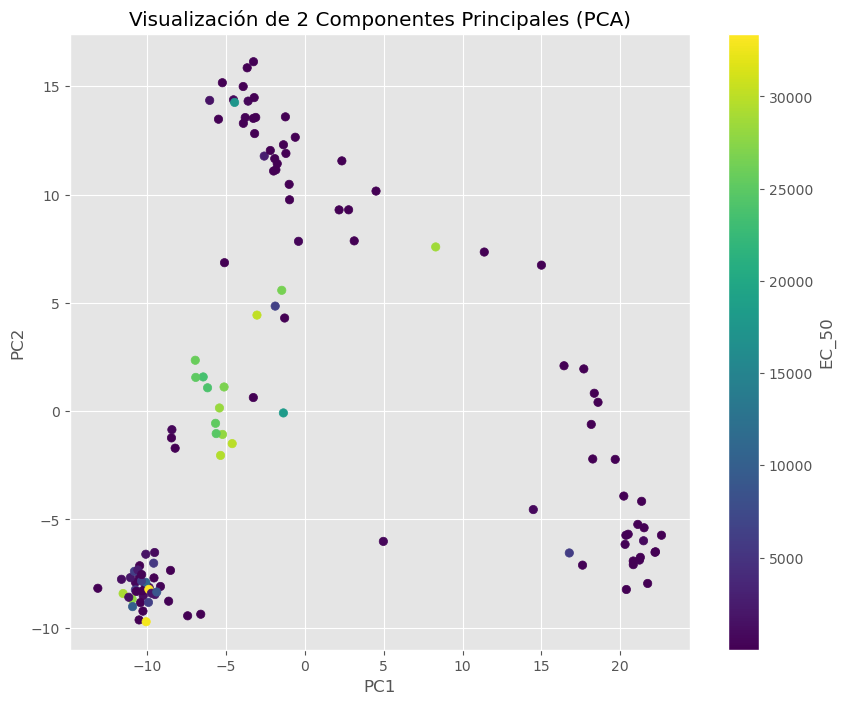

In [33]:
# Plot
plot_pca_2d(final_df, color_by=final_df['EC50_T2'],label = "EC_50")

#### Análisis e Interpretación de los Componentes Principales

![AnalsisPCA](Pictures/ClustersPCA.jpg)


El gráfico de PCA revela cinco zonas distintas que correlacionan las características fisicoquímicas de los péptidos (capturadas por PC1 y PC2) con su potencia biológica (EC₅₀).

- **Zona 1 (Péptidos Potentes)**: Ubicada en la esquina inferior izquierda, agrupa péptidos con EC₅₀ baja (<5,000). Sus valores negativos en PC1 y PC2 sugieren alta hidrofobicidad, carga favorable y una composición rica en residuos apolares, lo que resulta en una alta afinidad por el receptor GLP-1.

- **Zona 2 (Potencia Media)**: En el centro-izquierda, esta zona contiene péptidos con EC₅₀ intermedia (10,000–20,000). Representa una transición donde un balance entre residuos polares y apolares resulta en una actividad moderada.

- **Zona 3 (Potencia Moderada a Baja)**: Situada en la región central, agrupa péptidos con EC₅₀ entre 15,000 y 25,000. Se caracterizan por menor hidrofobicidad y mayor flexibilidad estructural, lo que limita su afinidad por el receptor. La dispersión en esta zona sugiere una alta variabilidad estructural.

- **Zona 4 (Familia Estructural)**: En la parte superior, esta zona muestra un clúster de péptidos con alta similitud interna y EC₅₀ de 5,000 a 15,000. Los altos valores de PC2 indican una secuencia ordenada y motivos conservados, representando un buen equilibrio entre estabilidad y actividad.

- **Zona 5 (Péptidos Menos Potentes)**: En el extremo derecho, agrupa los péptidos con EC₅₀ alta (>25,000). Sus altos valores de PC1 se asocian con mayor polaridad y menor estabilidad, lo que dificulta una interacción eficaz con el receptor.

### Cálculo de PCA con los datos obtenidos de CD-HIT

In [34]:
# Separación de los dato de la columna objetivo y el identificador
features = df_descriptores_cdhit.drop(columns=['ID'])

# Aplicación de el escalado de características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([pca_df, target], axis=1)

In [35]:
#muestra de datos
final_df.head(3)

,PC1,PC2,EC50_T2
0,3.500707,-6.353169,563.0
1,4.085036,-7.784408,552.0
2,5.327651,-7.648149,252.0


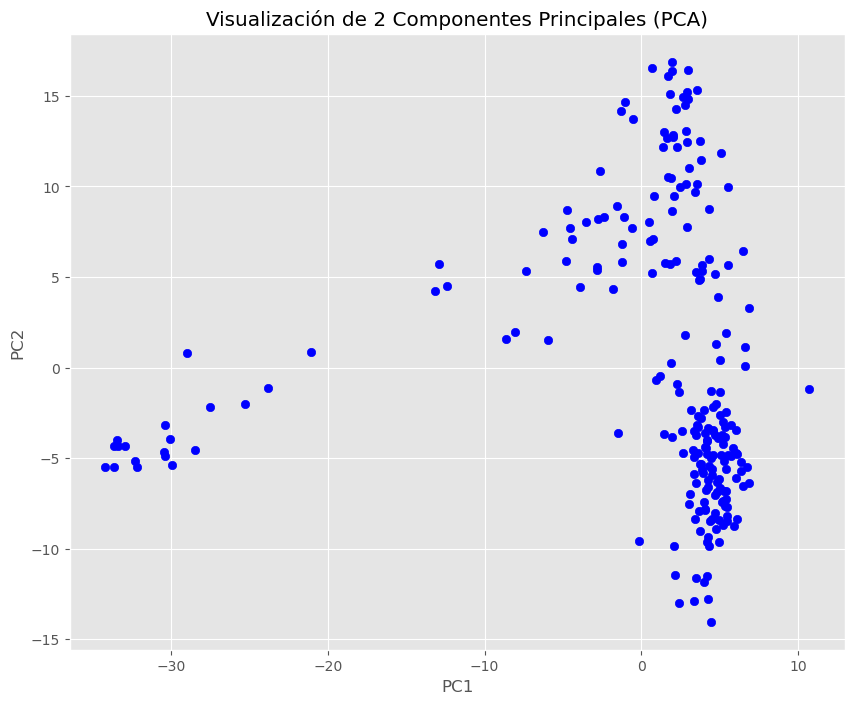

In [36]:
#plot
plot_pca_2d(final_df)

#### Análisis PCA del Conjunto de Péptidos con Actividad Desconocida


![imagenPCAPeptidos2](Pictures/FigPCApeptidos.png)

En el análisis de componentes principales (PCA) realizado sobre el conjunto de péptidos con actividad EC₅₀ desconocida, se observan tres zonas bien delimitadas. Al comparar su distribución con la del gráfico anterior, se pueden inferir las siguientes conclusiones:

- Zona Izquierda: Los péptidos agrupados en esta región muestran una alta similitud con los de la Zona 2 del análisis previo. Esta correspondencia sugiere que podrían tener una actividad biológica favorable sobre el receptor GLP-1R.

- Zonas Central y Derecha: Los péptidos ubicados en las dos zonas restantes se distribuyen en una posición intermedia, análoga a la transición entre las Zonas 2 y 3 del análisis anterior. Debido a esta localización, se predice que su actividad biológica podría ser de moderada a baja.

#### Interpretación de componentes principales (PC1, PC2)
Es posible identificar que propiedades son mas importantes para determinar las características de los peptidos

Principales contribuyentes a PC1:


,PC1,PC2,|PC1|,|PC2|
CTDD_polarity.1.residue0,0.095390,0.007709,0.095390,0.007709
CTDD_hydrophobicity_PONP930101.3.residue0,0.095390,0.007709,0.095390,0.007709
CTDD_hydrophobicity_FASG890101.2.residue50,-0.093675,-0.001105,0.093675,0.001105
CTDD_hydrophobicity_ARGP820101.3.residue0,0.090265,0.007705,0.090265,0.007705
CTDD_hydrophobicity_ZIMJ680101.3.residue0,0.090265,0.007705,0.090265,0.007705
PAAC_Xc1.R,-0.090244,-0.006294,0.090244,0.006294
DPC_EP,-0.089846,-0.019181,0.089846,0.019181
PAAC_Xc1.L,-0.089491,-0.007178,0.089491,0.007178
PAAC_Xc1.M,-0.089125,0.014207,0.089125,0.014207
DPC_WQ,-0.087349,-0.019352,0.087349,0.019352


Principales contribuyentes a PC2:


,PC1,PC2,|PC1|,|PC2|
CTDT_polarity.Tr1331,-0.012845,0.104502,0.012845,0.104502
CTDC_polarizability.G3,-0.015788,0.103369,0.015788,0.103369
CTDC_normwaalsvolume.G3,-0.015788,0.103369,0.015788,0.103369
SOCNumber_Schneider.lag1,0.013447,0.097556,0.013447,0.097556
DPC_HS,-0.023435,0.095339,0.023435,0.095339
CTDC_polarity.G2,0.048269,-0.093007,0.048269,0.093007
CTDT_hydrophobicity_CASG920101.Tr1331,0.009867,0.091870,0.009867,0.091870
CTDC_hydrophobicity_ZIMJ680101.G1,0.012296,-0.091820,0.012296,0.091820
AAC_Q,-0.028507,-0.091736,0.028507,0.091736
CTDT_secondarystruct.Tr1221,-0.007213,0.089768,0.007213,0.089768


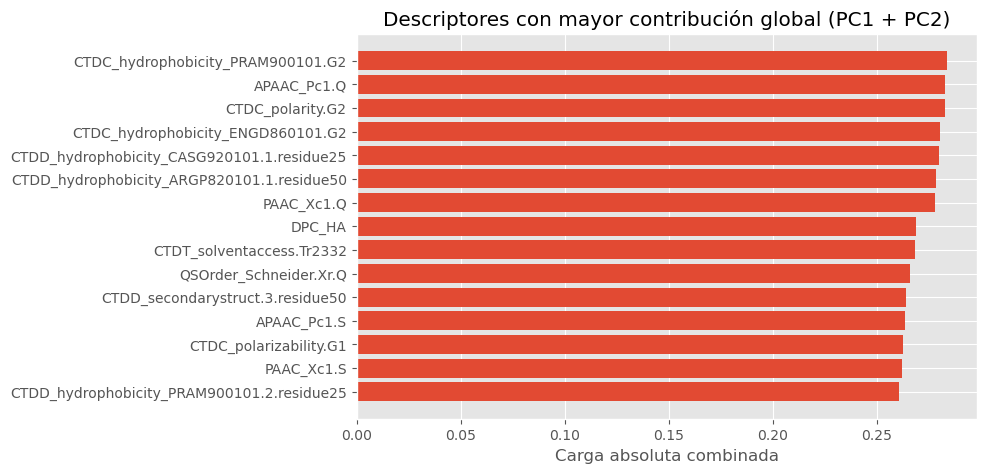

In [37]:
# Interpretación de componentes principales (PC1, PC2)
pca_result = pca 

# Crear un DataFrame con los "loadings" o pesos de cada descriptor
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index= features.columns
)

# Calcular la contribución absoluta total de cada descriptor
loadings['|PC1|'] = loadings['PC1'].abs()
loadings['|PC2|'] = loadings['PC2'].abs()

# Mostrar los 10 descriptores con mayor influencia en cada componente
print("Principales contribuyentes a PC1:")
display(loadings.sort_values('|PC1|', ascending=False).head(10))

print("Principales contribuyentes a PC2:")
display(loadings.sort_values('|PC2|', ascending=False).head(10))

# graficar la contribución visualmente

top_features = loadings.abs().sum(axis=1).sort_values(ascending=False).head(15)
plt.figure(figsize=(8,5))
plt.barh(top_features.index, top_features.values)
plt.gca().invert_yaxis()
plt.title("Descriptores con mayor contribución global (PC1 + PC2)")
plt.xlabel("Carga absoluta combinada")
plt.show()


Al analizar los descriptores más influyentes se distingen patrones claros y biológicamente relevantes:

- La Hidrofobicidad y la Polaridad son Clave: La propiedad más recurrente en la lista es, por mucho, la hidrofobicidad, seguida de la polaridad. Descriptores como CTDC_hydrophobicity, CTDD_hydrophobicity y CTDC_polarity dominan los primeros puestos. Esto indica que la principal fuente de variación entre los péptidos es su afinidad por el agua. Biológicamente, esto es crucial, ya que la hidrofobicidad dicta cómo se pliega un péptido, su estabilidad y cómo interactúa con el receptor GLP-1, que está en un entorno de membrana celular.

- La Composición y Distribución (CTD) Importan: La fuerte presencia de descriptores de la familia CTD (CTDC, CTDD, CTDT) sugiere que no solo importa qué propiedades tienen los péptidos, sino también en qué proporción (Composición) y en qué parte de la secuencia se localizan (Distribución). Por ejemplo, CTDD_hydrophobicity...residue25 y ...residue50 señalan que la hidrofobicidad en el primer cuarto y en la mitad de la secuencia son factores particularmente distintivos.

- El Orden de la Secuencia y Residuos Específicos son Relevantes: La aparición de descriptores PAAC, APAAC y QSOrder confirma que el orden secuencial de los aminoácidos es un factor determinante. Estos métodos capturan correlaciones entre residuos a lo largo de la cadena. Notablemente, varios de los descriptores más importantes están asociados con aminoácidos específicos:

- Glutamina (Q): Aparece en APAAC_Pc1.Q, PAAC_Xc1.Q y QSOrder...Xr.Q.

- Serina (S): Presente en APAAC_Pc1.S y PAAC_Xc1.S.

- Dipéptido Histidina-Alanina (HA): Destaca en DPC_HA.


En conjunto, los descriptores de tipo DPC (Pairs de aminoácidos) capturan interacciones locales entre residuos adyacentes o cercanos, revelando los patrones de carga y polaridad que gobiernan la afinidad con el receptor GLP-1r. Por su parte, los CTD (Composition, Transition, Distribution) y CTDD aportan información sobre la organización global de propiedades como la hidrofobicidad y la carga, que son esenciales para mantener la estabilidad conformacional y definir las regiones activas de unión. Por último, los PAAC y SOCNumber integran dependencias de largo alcance, permitiendo representar la arquitectura tridimensional del péptido más allá de la composición lineal.

### Cálculo de la varianza acumulada

Aunque una visualización en 2D es útil, se pierde información si se entrena un modelo solo con 2 componentes. Por ello, también calcularemos la varianza acumulada explicada, para determinar el número de componentes que capturan mas de 90% de las características.

 Este gráfico muestra qué porcentaje de la información total de los datos originales es capturado por un número determinado de componentes. Esto es importante para decidir cuántos componentes principales necesitaríamos para entrenar un modelo futuro sin perder una cantidad significativa de información.

In [38]:
# Calculo de PCA con todos los componentes
# Se deja PCA() vacío para que calcule todos los componentes posibles
pca = PCA()
pca.fit(features_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


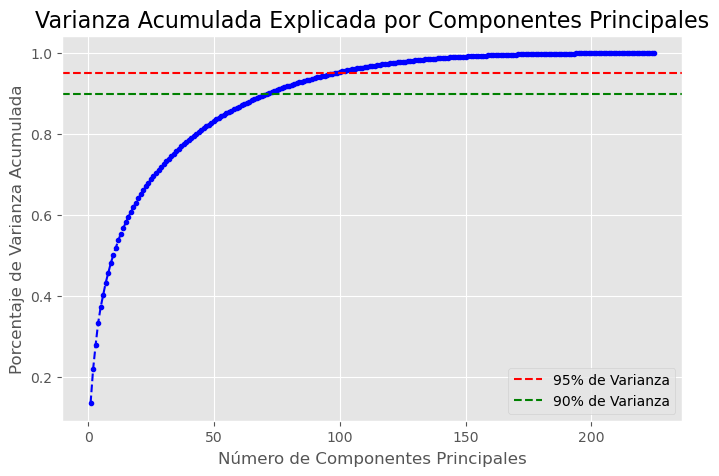

In [39]:
# Calcular la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance_plot(cumulative_variance)

#### Interpretación del Gráfico de Varianza Acumulada 

La curva azul muestra que Los primeros componentes principales son los más importantes, ya que capturan la mayor parte de la varianza. La curva crece muy rápidamente al principio.
A medida que añadimos más componentes, la ganancia de información adicional es cada vez menor, lo que se refleja en que la curva se va aplanando.

- Umbral del 90% (Línea Verde): Para retener el 90% de la varianza total de los datos originales, necesitaríamos aproximadamente 78 componentes principales. Esto implica que podemos reducir la dimensionalidad de nuestro conjunto de datos de 224 a solo 78 características y aun así conservar la gran mayoría de la información relevante.

- Umbral del 95% (Línea Roja): Si deseamos retener el 95% de la varianza, el número de componentes necesarios aumenta a aproximadamente 100. Para ganar ese 5% adicional de información, necesitamos incluir 22 componentes más.

## Conclusiones

Conclusiones del Análisis
Este análisis se realizó la ingeniería de características, fundamental para transformar las secuencias de péptidos en un conjunto de datos estructurado y de alta calidad, listo para un modelado predictivo.
Las principales conclusiones son:
1.	Generación de Descriptores: Se generó un conjunto  de descriptores fisicoquímicos (AAC, DPC, CTD, PAAC, QSOrder) que capturan las propiedades biológicas de los péptidos, como son la hidrofobicidad y la carga, traduciendo la información biológica a un formato numérico analizable.

2.	Reducción de Redundancia Validada: La aplicación de CD-HIT eliminó la redundancia en el conjunto de datos, como se demostró en los mapas de calor. Esto para evitar el sesgo y mejorar la capacidad de generalización de los modelos de machine learning de la entrega siguiente.

3.	Dimensionalidad de PCA: El análisis de componentes principales (PCA) mostro que es posible reducir significativamente la dimensionalidad del espacio de características. Con aproximadamente 100 componentes se logra retener el 95% de la información original, si se requiere reducir mas la dimensionalidad se puede usar un conjunto de 68 características que modelan el 90% del comportamiento.

4.	Interpretación Biológica Coherente: El PCA reveló que la variación en los datos está impulsada por propiedades biológicamente relevantes. Los componentes principales se asociaron claramente con la hidrofobicidad, el orden secuencial y la flexibilidad, validando la conexión entre las características extraídas y la actividad biológica de los péptidos.

5.	Validación de Clústeres por Actividad: La visualización del plano PCA nos permitió agrupar los péptidos en clústeres o zonas bien definidas. Se puede apreciar una fuerte correlación entre la posición de estos clústeres y la actividad biológica (EC₅₀), con grupos de péptidos de alta, media y baja potencia. Esto nos permite inferir que grupos de péptidos pueden tener mayor actividad sobre le receptor GLP-1R.


## Referencias

Chou, K. (2001). Prediction of protein cellular attributes using pseudo‐amino acid composition. Proteins Structure Function And Bioinformatics, 43(3), 246-255. https://doi.org/10.1002/prot.1035


- Jolliffe, I. T. (2002). Principal Component Analysis (2nd ed.). Springer.

- Shlens, J. (2014). A tutorial on principal component analysis. ArXiv. https://doi.org/10.48550/arXiv.1404.1100

- Home. (n.d.). https://sites.google.com/view/cd-hit

- Fu, L., Niu, B., Zhu, Z., Wu, S., & Li, W. (2012). CD-HIT: accelerated for clustering the next-generation sequencing data. Bioinformatics, 28(23), 3150-3152. https://doi.org/10.1093/bioinformatics/bts565